# FIFA World Cup Analysis

---------------
## Context
---------------

The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship is contested every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. It is one of the most prestigious and important trophies in the sport of football.

-----------------
## Objective
-----------------

A new football club named 'Brussels United FC' has just been inaugurated. As a member of this club, my task is to carry the  analysis on the world cup data.

-------------------------
## Data Dictionary
-------------------------

The World Cups dataset has the following information about all the World Cups in history till 2014.

**Year**: Year in which the world cup was held
    
**Country**: Country where the world cup was held
    
**Winner**: Team that won the world cup
    
**Runners-Up**: Team that came second
    
**Third**: Team that came third
    
**Fourth**: Team that came fourth
    
**GoalsScored**: Total goals scored in the world cup
    
**QualifiedTeams**: Number of teams that qualified for the world cup
    
**MatchesPlayed**: Total matches played in the world cup
    
**Attendance**: Total attendance in the world cup

*Importing Necessary libraries*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

*Reading the dataset*

In [2]:
df = pd.read_csv('WorldCups.csv')
df.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


*Basic info about the dataset*

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [4]:
df.describe(include='all')

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
count,20.000000,20,20,20,20,20,20.000000,20.000000,20.000000,20
unique,NaN,15,9,10,14,16,NaN,NaN,NaN,20
top,NaN,Germany,Brazil,Netherlands,Germany,Uruguay,NaN,NaN,NaN,1.545.791
freq,NaN,2,5,3,3,3,NaN,NaN,NaN,1
mean,1974.800000,NaN,NaN,NaN,NaN,NaN,118.950000,21.250000,41.800000,NaN
std,25.582889,NaN,NaN,NaN,NaN,NaN,32.972836,7.268352,17.218717,NaN
min,1930.000000,NaN,NaN,NaN,NaN,NaN,70.000000,13.000000,17.000000,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,89.000000,16.000000,30.500000,NaN
50%,1976.000000,NaN,NaN,NaN,NaN,NaN,120.500000,16.000000,38.000000,NaN
75%,1995.000000,NaN,NaN,NaN,NaN,NaN,145.250000,26.000000,55.000000,NaN


*Exploratory Data Analysis*

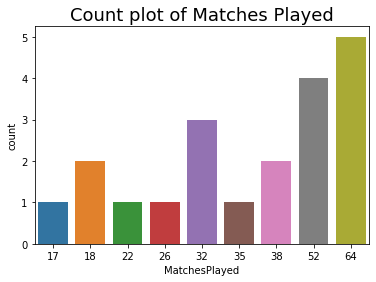

In [5]:
sns.countplot(x='MatchesPlayed', data=df)
plt.title('Count plot of Matches Played', size=18)
plt.show()

In [6]:
df1 = df.groupby(['Winner'])['Country'].count().to_frame().reset_index()
df1 = df1.rename(columns={'Country': 'Championships', 'Winner':'Country'})
df1 = df1.sort_values(by='Championships', ascending=False).reset_index(drop=True)
display(df1)

,Country,Championships
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Argentina,2
4,Uruguay,2
5,England,1
6,France,1
7,Germany,1
8,Spain,1


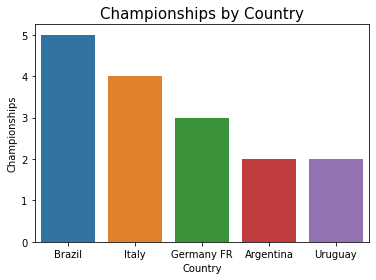

In [7]:
sns.barplot(x='Country', y='Championships', data=df1.head())
plt.title('Championships by Country', size=15)
plt.show()

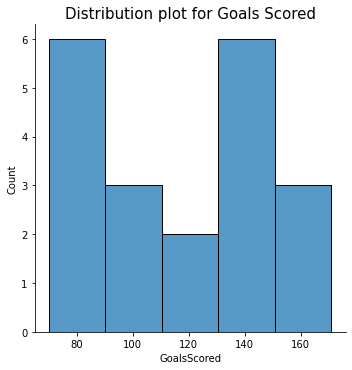

In [8]:
sns.displot(x='GoalsScored', data=df, bins=5)
plt.title('Distribution plot for Goals Scored', size=15)
plt.show()

In [9]:
df2 = df.groupby(['Year'])['GoalsScored'].sum().to_frame().sort_values(by='GoalsScored', ascending=False).reset_index()
display(df2)

,Year,GoalsScored
0,2014,171
1,1998,171
2,2002,161
3,2006,147
4,1982,146
5,2010,145
6,1994,141
7,1954,140
8,1986,132
9,1958,126


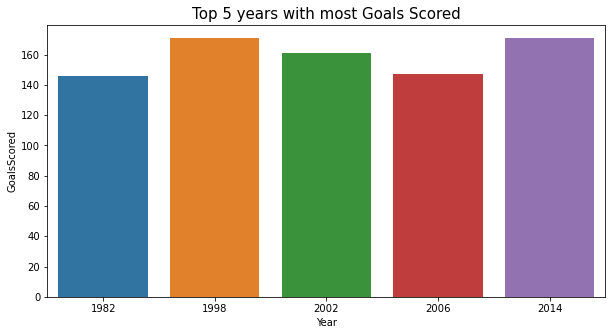

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(y='GoalsScored', x='Year', data=df2.head())
plt.title('Top 5 years with most Goals Scored', size=15)
plt.show()

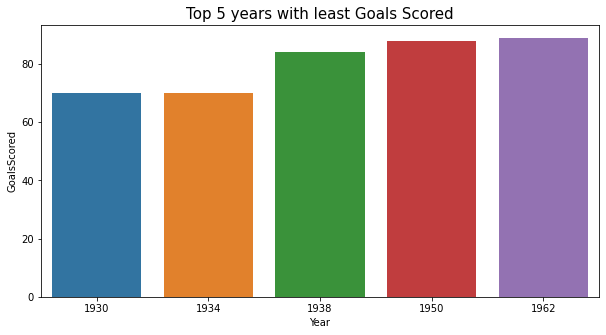

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(y='GoalsScored', x='Year', data=df2.tail())
plt.title('Top 5 years with least Goals Scored', size=15)
plt.show()

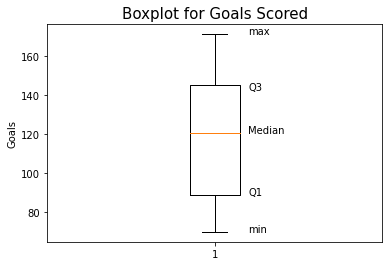

In [12]:
plt.boxplot(df['GoalsScored'])
plt.text(x=1.1, y=df['GoalsScored'].min(), s='min')
plt.text(x=1.1, y=df['GoalsScored'].quantile(0.24), s='Q1')
plt.text(x=1.1, y=df['GoalsScored'].median(), s='Median')
plt.text(x=1.1, y=df['GoalsScored'].quantile(0.70), s='Q3')
plt.text(x=1.1, y=df['GoalsScored'].max(), s='max')
plt.title('Boxplot for Goals Scored', size=15)
plt.ylabel('Goals')
plt.show()

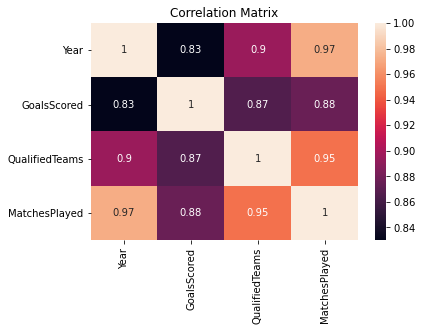

In [13]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

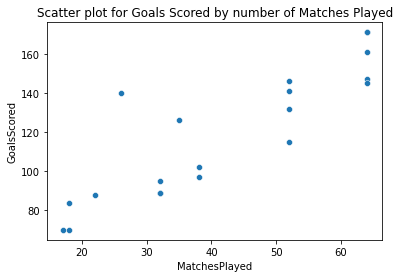

In [14]:
sns.scatterplot(data=df, x='MatchesPlayed', y='GoalsScored')
plt.title('Scatter plot for Goals Scored by number of Matches Played')
plt.show()